In [28]:
from ast import literal_eval

import numpy as np
import pandas as pd

import seaborn as sns

In [29]:
def read_excel_multisheet(fn):
    dfs = []

    for sheet in pd.ExcelFile(fn).sheet_names:
        df = pd.read_excel(fn, sheet_name=sheet, index_col="Unnamed: 0")
        df["source"] = sheet
        df = df[["source", *[col for col in df.columns if col!="source"]]]
        dfs.append(df)

    dfs = pd.concat(dfs)
    return dfs

In [ ]:
df1 = pd.read_excel("../data_for_comparison/corr/scores_combined.xlsx", index_col="Unnamed: 0")
df2 = pd.read_excel("../data_for_comparison/corr/individ_metrics_onesheet.xlsx", index_col="Unnamed: 0")
df2["options"] = df2["options"].apply(lambda x: pd.Series(literal_eval(x)).dropna().tolist())
df2["ground_truth"] = df2["ground_truth"].apply(lambda x: pd.Series(literal_eval(x)).dropna().tolist())
df3 = read_excel_multisheet("../data_for_comparison/corr/syntaxcomp_metrics_spacy.xlsx")

In [31]:
df1.groupby(["source", "question"])[
    ["gemini_guess", "vso_intersec_ind", "vs_intersec_ind",
     "noun_intersec_ind", "propn_intersec_ind"]
].mean()

gemini_guess  \
source           question                                                    
BartDG           Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.254717   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.933333   
BartDG_ANPM      Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.188679   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.885246   
BartDG_PM        Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.186916   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.950000   
ChatGPT4o        Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.301887   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.950000   
Deepseek         Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.171429   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.966667   
MuSeRC_GPT3      Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.147059   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.807018   
MuSeRC_T5        Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.230769   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.702703   
RuRace_GPT3      Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.100000   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.910714   
RuRace_T5        Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.237624   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.830508   
true_distractors Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?      0.962264   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?         0.950000   

                                                              vso_intersec_ind  \
source           question                                                        
BartDG           Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.037736   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.000000   
BartDG_ANPM      Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.009434   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.016393   
BartDG_PM        Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.000000   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.000000   
ChatGPT4o        Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.000000   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.016667   
Deepseek         Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.000000   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.016667   
MuSeRC_GPT3      Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.009804   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.017544   
MuSeRC_T5        Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.038462   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.081081   
RuRace_GPT3      Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.020000   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.017857   
RuRace_T5        Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.059406   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.016949   
true_distractors Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?          0.028302   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?             0.016667   

                                                              vs_intersec_ind  \
source           question                                                       
BartDG           Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?         0.084906   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?            0.016667   
BartDG_ANPM      Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?         0.047170   
                 Какое высказывание СООТВЕТСТВУЕТ тексту?            0.032787   
BartDG_PM        Какое высказывание НЕ СООТВЕТСТВУЕТ т

In [32]:
df1.head()

,source,reading_text,question,distractor,gemini_guess,vso_intersec_ind,vs_intersec_ind,vs_passivized_intersec_ind,noun_intersec_ind,propn_intersec_ind
0,BartDG,На задворках нашего села стояло на сваях длин...,Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,Автор очень любил свою родину.,1,0,0,0,1,0
1,BartDG,На задворках нашего села стояло на сваях длин...,Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,Автор часто играл на скрипке на своей родине.,0,0,0,0,1,0
2,BartDG,На задворках нашего села стояло на сваях длин...,Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,Соотечественник автора спас жизнь своему сыну ...,0,0,0,0,1,0
3,BartDG,"Мы ехали берегом Лены на юг, а зима догоняла ...",Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,Оба козла были горными козлами.,0,0,0,0,0,0
4,BartDG,"Мы ехали берегом Лены на юг, а зима догоняла ...",Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,"Старая коза, маленькая, была готова снова прыг...",0,0,0,0,1,0


In [33]:
df2.head()

,Source,qid,options,ground_truth,common_ngrams,bleu1,bleu2,bleu3,bleu4,rouge1,rouge2,rougeL,meteor,bertscore
0,BartDG,0,"[Автор очень любил свою родину., Автор часто и...","[Рассказчик был сиротой., В детстве эта мелоди...","[{'ngram': 'на', 'count_generated': 2, 'count_...",0.045455,0.0,0.0,0.0,0.051282,0.0,0.051282,0.025907,0.659517
1,BartDG,1,"[Оба козла были горными козлами., Старая коза,...","[Собеседник рассказчика, Сокольский, сомневает...","[{'ngram': 'со', 'count_generated': 2, 'count_...",0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.612921
2,BartDG,2,[Поли стыдилась своего первоначального выбора....,"[Родион встретил девочку перед наступлением., ...","[{'ngram': 'в', 'count_generated': 6, 'count_o...",0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.675937
3,BartDG,3,[Классный менеджер всегда был милым и вежливым...,[Белый билет не давал учителю возможности уйти...,"[{'ngram': 'и', 'count_generated': 9, 'count_o...",0.037530,0.0,0.0,0.0,0.045455,0.0,0.045455,0.019608,0.655204
4,BartDG,4,[Иван стал заслуженным художником и режиссёром...,"[Убежище, в котором укрывалась рассказчица, не...","[{'ngram': 'и', 'count_generated': 6, 'count_o...",0.038969,0.0,0.0,0.0,0.051282,0.0,0.051282,0.021459,0.635408


In [34]:
df3.head()

,source,distractor_set_id,distractor_id,distractor_text,distractor_parse,Number of Sentences,Number of Words,Number of Clauses,Number of T-Units,Mean Sentence Length,...,acl:relcl_ratio,advcl_ratio,advcl:relcl_ratio,ccomp_ratio,csubj_ratio,csubj:outer_ratio,nsubj:outer_ratio,parataxis_ratio,xcomp_ratio,conj_ratio
0,BartDG,0,0,Автор очень любил свою родину.,# sent_id = 1\n# text = Автор очень любил свою...,1.0,5.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BartDG,0,1,Автор часто играл на скрипке на своей родине.,# sent_id = 1\n# text = Автор часто играл на с...,1.0,8.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BartDG,0,2,Соотечественник автора спас жизнь своему сыну ...,# sent_id = 1\n# text = Соотечественник автора...,1.0,9.0,1.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BartDG,1,3,Оба козла были горными козлами.,# sent_id = 1\n# text = Оба козла были горными...,1.0,5.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BartDG,1,4,"Старая коза, маленькая, была готова снова прыг...","# sent_id = 1\n# text = Старая коза, маленькая...",1.0,7.0,2.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0


In [35]:
df1 = df1.rename(
    columns={
        "vso_intersec_ind": "FullVPMatch",
        "vs_intersec_ind": "SubjVPMatch",
        "noun_intersec_ind": "NounMatch",
        "propn_intersec_ind": "PropnMatch"
    }
)

In [36]:
len(df1), len(df3)

(1561, 1561)

In [37]:
df1[df1["distractor"].values != df3["distractor_text"].values]

,source,reading_text,question,distractor,gemini_guess,FullVPMatch,SubjVPMatch,vs_passivized_intersec_ind,NounMatch,PropnMatch
370,BartDG_ANPM,"3емля — космическое тело, а мы — космонавты, ...",Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,NaN,0,0,0,0,0,0
1326,ChatGPT4o,"Небо заволокло злыми тучами, дождь печально к...",Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,NaN,0,0,0,0,0,0


In [38]:
df3[df1["distractor"].values != df3["distractor_text"].values]

,source,distractor_set_id,distractor_id,distractor_text,distractor_parse,Number of Sentences,Number of Words,Number of Clauses,Number of T-Units,Mean Sentence Length,...,acl:relcl_ratio,advcl_ratio,advcl:relcl_ratio,ccomp_ratio,csubj_ratio,csubj:outer_ratio,nsubj:outer_ratio,parataxis_ratio,xcomp_ratio,conj_ratio
37,BartDG_ANPM,11,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,ChatGPT4o,32,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
len(df2)

495

In [40]:
df3.columns

Index(['source', 'distractor_set_id', 'distractor_id', 'distractor_text',
       'distractor_parse', 'Number of Sentences', 'Number of Words',
       'Number of Clauses', 'Number of T-Units', 'Mean Sentence Length',
       'Mean Clause Length', 'Mean T-Unit Length',
       'Mean Number of Clauses per Sentence',
       'Mean Number of Clauses per T-Unit', 'Mean Tree Depth',
       'Median Tree Depth', 'Minimum Tree Depth', 'Maximum Tree Depth',
       'Mean Dependency Distance', 'Node-to-Terminal-Node Ratio',
       'Average Levenshtein Distance between POS',
       'Average Levenshtein Distance between deprel', 'Average NP Length',
       'Complex NP Ratio', 'Number of Combined Clauses',
       'Number of Coordinate Clauses', 'Number of Subordinate Clauses',
       'Coordinate to Combined Clause Ratio',
       'Subordinate to Combined Clause Ratio',
       'Coordinate to Subordinate Clause Ratio',
       'Coordinate Clause to Sentence Ratio',
       'Subordinate Clause to Sentence Rati

In [41]:
fact_cols = ["gemini_guess", "FullVPMatch", "SubjVPMatch", "NounMatch", "PropnMatch"]
synt_cols = [
    "num_sents", "num_words", "mean_clause_len", "num_clauses",
    "max_tree_depth", "mean_dep_dist", "node_leaf_ratio", "avg_np_len",
    "comp_np_ratio", "cnt_comb_clauses", "num_coord_clauses", "num_subord_clauses"
]

In [42]:
df3 = df3.rename(columns={
    "Number of Sentences": "num_sents",
    "Number of Words": "num_words",
    "Mean Clause Length": "mean_clause_len",
    "Number of Clauses": "num_clauses",
    "Maximum Tree Depth": "max_tree_depth",
    "Mean Dependency Distance": "mean_dep_dist",
    "Node-to-Terminal-Node Ratio": "node_leaf_ratio",
    "Average NP Length": "avg_np_len",
    "Complex NP Ratio": "comp_np_ratio",
    "Number of Combined Clauses": "cnt_comb_clauses",
    "Number of Coordinate Clauses": "num_coord_clauses",
    "Number of Subordinate Clauses": "num_subord_clauses"
})

In [43]:
def cross_corr(df1, df2, cols1, cols2):
    df_a = df1.reset_index()[cols1]
    df_b = df2.reset_index()[cols2]
    corr = pd.concat([df_a, df_b], axis=1).corr()
    cross_corr = corr[cols1].loc[cols2]
    return cross_corr

In [44]:
len(df1), len(df1.index.unique())

(1561, 1561)

In [45]:
len(df3), len(df3.index.unique())

(1561, 167)

In [46]:
fact_synt_corr = cross_corr(df1, df3, fact_cols, synt_cols)

In [47]:
fact_synt_corr

,gemini_guess,FullVPMatch,SubjVPMatch,NounMatch,PropnMatch
num_sents,0.009546,-0.012853,-0.020843,0.035333,-0.017709
num_words,0.008129,0.065344,0.071441,0.271802,0.112545
mean_clause_len,-0.026708,-0.014541,-0.035144,0.190677,0.051136
num_clauses,0.018974,0.075348,0.097821,0.098851,0.046146
max_tree_depth,0.013200,0.067330,0.079944,0.227791,0.036212
mean_dep_dist,0.019822,0.057067,0.042078,0.136876,0.100463
node_leaf_ratio,0.022565,-0.018426,-0.000485,0.090771,-0.013679
avg_np_len,0.010392,-0.039537,-0.062105,0.180887,-0.034475
comp_np_ratio,0.015623,-0.067056,-0.086784,0.186535,-0.003898
cnt_comb_clauses,0.017460,0.078901,0.103217,0.093674,0.050176


In [ ]:
fact_synt_corr.to_excel("../data_output_table/fact_synt_corr.xlsx", float_format="%.2f")

<Axes: >

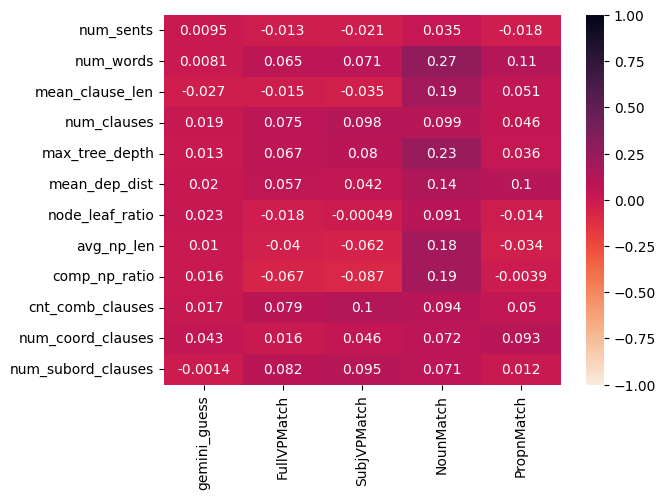

In [49]:
hm = sns.heatmap(fact_synt_corr, annot=True, vmin=-1, vmax=1, cmap=sns.cm.rocket_r)
hm

In [ ]:
hm.get_figure().savefig(
    "../data_output_image/fact_synt_heatmap.png", bbox_inches="tight"
)

In [51]:
fact_fact_corr = df1[fact_cols].corr()

In [52]:
fact_fact_corr

,gemini_guess,FullVPMatch,SubjVPMatch,NounMatch,PropnMatch
gemini_guess,1.000000,-0.025575,0.015088,0.035738,0.079505
FullVPMatch,-0.025575,1.000000,0.616750,0.031720,0.000577
SubjVPMatch,0.015088,0.616750,1.000000,0.033581,0.030160
NounMatch,0.035738,0.031720,0.033581,1.000000,-0.046104
PropnMatch,0.079505,0.000577,0.030160,-0.046104,1.000000


In [ ]:
fact_fact_corr.to_excel(
    "../data_output_table/fact_fact_corr.xlsx", float_format="%.2f"
)

<Axes: >

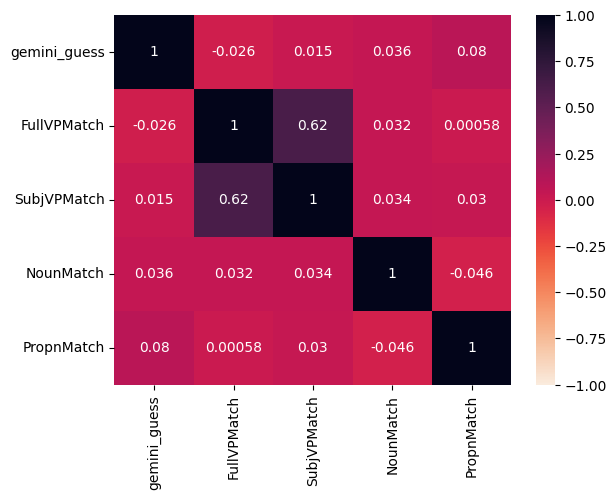

In [54]:
hm = sns.heatmap(fact_fact_corr, annot=True, vmin=-1, vmax=1, cmap=sns.cm.rocket_r)
hm

In [ ]:
hm.get_figure().savefig("../data_output_image/fact_fact_heatmap.png", bbox_inches="tight")

In [56]:
df3

,source,distractor_set_id,distractor_id,distractor_text,distractor_parse,num_sents,num_words,num_clauses,Number of T-Units,Mean Sentence Length,...,acl:relcl_ratio,advcl_ratio,advcl:relcl_ratio,ccomp_ratio,csubj_ratio,csubj:outer_ratio,nsubj:outer_ratio,parataxis_ratio,xcomp_ratio,conj_ratio
0,BartDG,0,0,Автор очень любил свою родину.,# sent_id = 1\n# text = Автор очень любил свою...,1.0,5.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,BartDG,0,1,Автор часто играл на скрипке на своей родине.,# sent_id = 1\n# text = Автор часто играл на с...,1.0,8.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,BartDG,0,2,Соотечественник автора спас жизнь своему сыну ...,# sent_id = 1\n# text = Соотечественник автора...,1.0,9.0,1.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,BartDG,1,3,Оба козла были горными козлами.,# sent_id = 1\n# text = Оба козла были горными...,1.0,5.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,BartDG,1,4,"Старая коза, маленькая, была готова снова прыг...","# sent_id = 1\n# text = Старая коза, маленькая...",1.0,7.0,2.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,true_distractors,53,161,Героине повествования медсёстры не разрешали в...,# sent_id = 1\n# text = Героине повествования ...,1.0,18.0,3.0,2.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333
162,true_distractors,53,162,Муж выздоровел благодаря заботам жены.,# sent_id = 1\n# text = Муж выздоровел благода...,1.0,5.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
163,true_distractors,54,163,"Пётр решил, выбравшись из западни, двигаться в...","# sent_id = 1\n# text = Пётр решил, выбравшись...",1.0,22.0,5.0,2.0,22.0,...,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.200000
164,true_distractors,54,164,Шведский король мечтал о реванше за поражение ...,# sent_id = 1\n# text = Шведский король мечтал...,1.0,20.0,3.0,2.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333


In [57]:
distractor_sets = [
    [item for item in group["distractor"].dropna().values] for gid, group in df1.groupby(["source", "reading_text"], sort=False)
    if gid[0] != "true_distractors"
]

In [58]:
len(distractor_sets)

495

In [59]:
eqs = [item_a == item_b for item_a, item_b in zip(distractor_sets, df2["options"].values)]
sum(eqs)

493

In [60]:
df2[~np.array(eqs)]

,Source,qid,options,ground_truth,common_ngrams,bleu1,bleu2,bleu3,bleu4,rouge1,rouge2,rougeL,meteor,bertscore
121,BartDG_ANPM,12,"[Жизнь на земле настолько сложна, что она держ...",[Жизнедеятельность человека представляет реаль...,"[{'ngram': 'на', 'count_generated': 11, 'count...",0.057143,0.000000,0.0,0.0,0.075472,0.000000,0.075472,0.031847,0.654010
472,ChatGPT4o,35,"[Иудин считает, что богатые всегда помогают бе...",[Похоронные процессии – богатая и бедная – нав...,"[{'ngram': 'что', 'count_generated': 1, 'count...",0.176391,0.073128,0.0,0.0,0.166667,0.030769,0.133333,0.125778,0.668691


In [61]:
distractor_sets[121]

['Жизнь на земле настолько сложна, что она держит себя в курсе.',
 'Жизнь на Земле так сложна, что она никогда не устает.',
 'Система жизнеобеспечения на Земле настолько сложна, что она до сих пор остается в силе.']

In [62]:
df2.iloc[121]["options"]

['Жизнь на земле настолько сложна, что она держит себя в курсе.',
 'Жизнь на Земле так сложна, что она никогда не устает.',
 'Система жизнеобеспечения на Земле настолько сложна, что она до сих пор остается в силе.',
 '']

In [63]:
distractor_sets[472]

['Иудин считает, что богатые всегда помогают бедным и думают о них.',
 'Поликарп Семёнович Иудин радуется дождю и считает его символом очищения.',
 'По мнению Иудина, жизнь полна радостей и смеха, которые преобладают над горем.']

In [64]:
df2.iloc[472]["options"]

['Иудин считает, что богатые всегда помогают бедным и думают о них.',
 '',
 'Поликарп Семёнович Иудин радуется дождю и считает его символом очищения.',
 'По мнению Иудина, жизнь полна радостей и смеха, которые преобладают над горем.']

In [65]:
df2

,Source,qid,options,ground_truth,common_ngrams,bleu1,bleu2,bleu3,bleu4,rouge1,rouge2,rougeL,meteor,bertscore
0,BartDG,0,"[Автор очень любил свою родину., Автор часто и...","[Рассказчик был сиротой., В детстве эта мелоди...","[{'ngram': 'на', 'count_generated': 2, 'count_...",0.045455,0.000000,0.000000,0.000000,0.051282,0.000000,0.051282,0.025907,0.659517
1,BartDG,1,"[Оба козла были горными козлами., Старая коза,...","[Собеседник рассказчика, Сокольский, сомневает...","[{'ngram': 'со', 'count_generated': 2, 'count_...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612921
2,BartDG,2,[Поли стыдилась своего первоначального выбора....,"[Родион встретил девочку перед наступлением., ...","[{'ngram': 'в', 'count_generated': 6, 'count_o...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.675937
3,BartDG,3,[Классный менеджер всегда был милым и вежливым...,[Белый билет не давал учителю возможности уйти...,"[{'ngram': 'и', 'count_generated': 9, 'count_o...",0.037530,0.000000,0.000000,0.000000,0.045455,0.000000,0.045455,0.019608,0.655204
4,BartDG,4,[Иван стал заслуженным художником и режиссёром...,"[Убежище, в котором укрывалась рассказчица, не...","[{'ngram': 'и', 'count_generated': 6, 'count_o...",0.038969,0.000000,0.000000,0.000000,0.051282,0.000000,0.051282,0.021459,0.635408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,ChatGPT4o,57,[Мишка всегда делился своими продуктами с сосе...,"[Рассказчик отправился домой, чтобы принести т...","[{'ngram': 'с', 'count_generated': 17, 'count_...",0.096554,0.000000,0.000000,0.000000,0.105263,0.000000,0.070175,0.048701,0.689212
491,ChatGPT4o,58,"[Люди, которые умеют удивляться, обычно живут ...","[Каждый раз, когда Архимед садился в ванну, он...","[{'ngram': 'умеют', 'count_generated': 1, 'cou...",0.204362,0.173633,0.137919,0.115331,0.263158,0.181818,0.210526,0.209732,0.734739
492,ChatGPT4o,59,[Соседи поэта всегда ценили его литературный т...,"[По мнению рассказчика, англичане пренебрежите...","[{'ngram': 'Шекспира', 'count_generated': 1, '...",0.034121,0.000000,0.000000,0.000000,0.043478,0.000000,0.043478,0.018315,0.652572
493,ChatGPT4o,103,"[Героиню сразу обеспечили защитной одеждой, по...",[Супруг героини получил огромную дозу облучени...,"[{'ngram': 'она', 'count_generated': 1, 'count...",0.070091,0.000000,0.000000,0.000000,0.088235,0.000000,0.029412,0.037500,0.692175


In [66]:
metric_cols = [
    "bleu1", "bleu2", "bleu3", "bleu4",
    "rouge1", "rouge2", "rougeL", "meteor", "bertscore"
]
df1_avg_by_q = df1.groupby(["source", "reading_text"], sort=False)[fact_cols].mean()
fact_metric_corr = cross_corr(df1_avg_by_q, df2, fact_cols, metric_cols)

In [67]:
fact_metric_corr

,gemini_guess,FullVPMatch,SubjVPMatch,NounMatch,PropnMatch
bleu1,-0.093322,0.009869,0.131524,0.304809,0.115846
bleu2,-0.017832,0.061429,0.122595,0.135858,0.149386
bleu3,-0.024000,0.074746,0.116887,0.072555,0.023836
bleu4,0.013153,0.104644,0.116666,0.042254,0.017850
rouge1,-0.050540,0.024495,0.125378,0.251932,0.153855
rouge2,-0.011048,0.084647,0.105647,0.072347,0.121166
rougeL,-0.035958,0.025215,0.115416,0.246899,0.153191
meteor,-0.070788,0.029308,0.116672,0.270369,0.151678
bertscore,0.093996,-0.054290,0.079195,0.346065,0.174437


In [ ]:
fact_metric_corr.to_excel("../data_output_table/fact_metric_corr.xlsx", float_format="%.2f")

<Axes: >

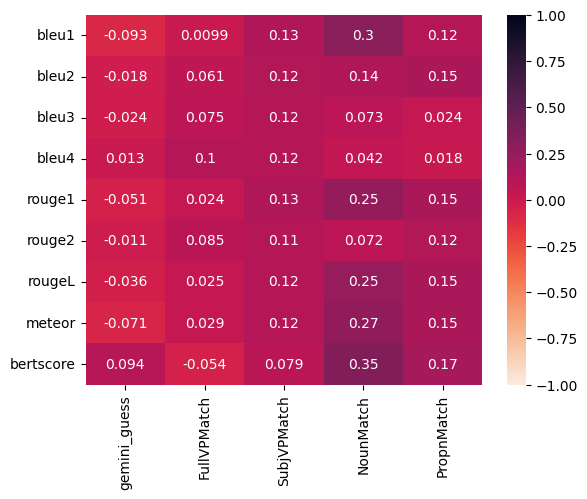

In [69]:
hm = sns.heatmap(fact_metric_corr, annot=True, vmin=-1, vmax=1, cmap=sns.cm.rocket_r)
hm

In [ ]:
hm.get_figure().savefig("../data_output_image/fact_metric_heatmap.png", bbox_inches="tight")